<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/news_daliy_category_prediction_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import os
import shutil
# Ignore all warnings
warnings.filterwarnings('ignore')

In [ ]:
# Create the ~/.kaggle directory
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Copy the kaggle.json file to the ~/.kaggle directory
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/'))

'C:\\Users\\rishu/.kaggle/kaggle.json'

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d crxxom/daily-google-news

daily-google-news.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_file_path = "daily-google-news.zip"
destination_directory = "News Categorical prediction"

# Open the ZIP file and extract its contents to the destination directory
with zipfile.ZipFile(zip_file_path, 'r') as zip:
    zip.extractall(destination_directory)

In [ ]:
df=pd.read_csv('News Categorical prediction/2023_9.csv')

In [ ]:
df.shape

(51302, 5)

In [ ]:
df.head()

,Title,Publisher,DateTime,Link,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Analytics Insight,2023-08-30T06:54:49Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
1,Funds punished for owning too few Nvidia share...,ZAWYA,2023-08-30T07:15:59Z,https://news.google.com/articles/CBMigwFodHRwc...,Business
2,Crude oil prices stalled as hedge funds sold: ...,ZAWYA,2023-08-30T07:31:31Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,2023-08-30T10:38:40Z,https://news.google.com/articles/CBMib2h0dHBzO...,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Better Homes & Gardens,2023-08-30T11:00:00Z,https://news.google.com/articles/CBMiPWh0dHBzO...,Business


In [ ]:
df.tail()

,Title,Publisher,DateTime,Link,Category
51297,Slovakia's Election Could Echo in Ukraine. Her...,The New York Times,2023-09-30T04:01:14Z,https://news.google.com/articles/CBMiU2h0dHBzO...,Worldwide
51298,Things to know about the Nobel Prizes - The Wa...,The Washington Post,2023-09-30T04:26:44Z,https://news.google.com/articles/CBMimQFodHRwc...,Worldwide
51299,"After brief calm, protests against killing of ...",Hindustan Times,2023-09-30T04:51:51Z,https://news.google.com/articles/CBMikgFodHRwc...,Worldwide
51300,‘No one is safe’: France vows action as bedbug...,CNN,2023-09-30T04:58:00Z,https://news.google.com/articles/CBMiTmh0dHBzO...,Worldwide
51301,Slovakia election: polls open in knife-edge vo...,The Guardian,2023-09-30T05:00:00Z,https://news.google.com/articles/CBMieWh0dHBzO...,Worldwide


In [ ]:
df['Category'].unique()

array(['Business', 'Entertainment', 'Headlines', 'Health', 'Science',
       'Sports', 'Technology', 'Worldwide'], dtype=object)

In [ ]:
df.isnull().sum()

Title        0
Publisher    0
DateTime     0
Link         0
Category     0
dtype: int64

In [ ]:
category_counts = df['Category'].value_counts()
category_counts.index

Index(['Sports', 'Headlines', 'Entertainment', 'Technology', 'Business',
       'Worldwide', 'Health', 'Science'],
      dtype='object', name='Category')

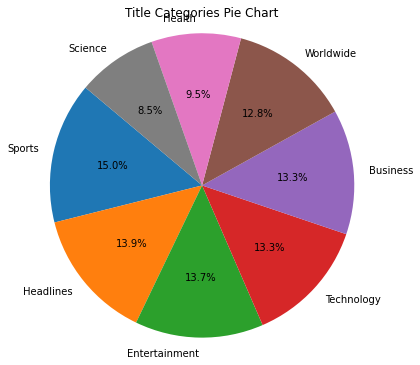

In [ ]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Title Categories Pie Chart")

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

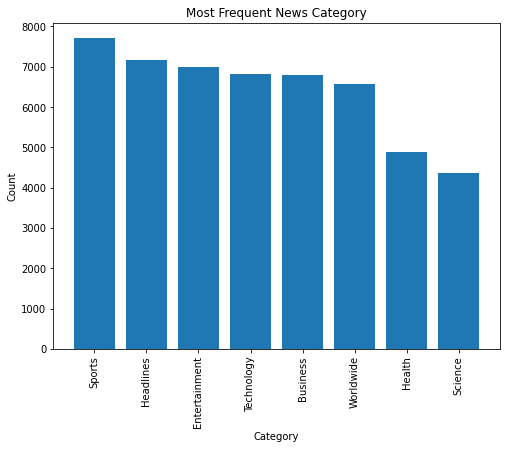

In [ ]:
most_frequent_category = category_counts.idxmax()
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title("Most Frequent News Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.show()

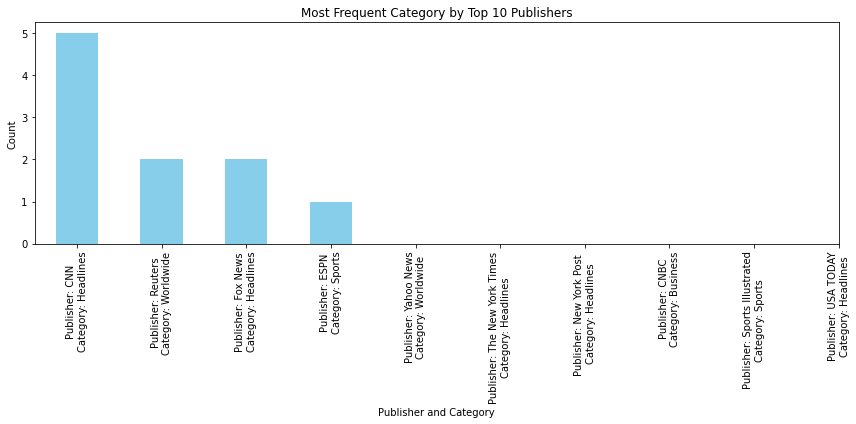

In [ ]:
# Group by Publisher and Category and count the occurrences
category_counts_by_publisher = df.groupby(['Publisher', 'Category']).size().unstack(fill_value=0)

most_frequent_category_by_publisher = category_counts_by_publisher.idxmax(axis=1)

top_10_publishers = df['Publisher'].value_counts().head(10).index

# Filter the data to include only the top 25 publishers
most_frequent_category_by_publisher = most_frequent_category_by_publisher[top_10_publishers]

# Create a bar plot for the most frequent category and publisher with labels
plt.figure(figsize=(12, 6))
ax = most_frequent_category_by_publisher.value_counts().plot(kind='bar', color='skyblue')

# Manually set the tick locations and labels
tick_positions = range(len(most_frequent_category_by_publisher))
ax.set_xticks(tick_positions)
ax.set_xticklabels([f"Publisher: {publisher}\nCategory: {most_frequent_category_by_publisher[publisher]}" for publisher in most_frequent_category_by_publisher.index], rotation=90)

plt.title("Most Frequent Category by Top 10 Publishers")
plt.xlabel("Publisher and Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
y=df['Category']

In [ ]:
y.unique()

array(['Business', 'Entertainment', 'Headlines', 'Health', 'Science',
       'Sports', 'Technology', 'Worldwide'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
le=LabelEncoder()
stc=StandardScaler()

In [ ]:
y_scaled=le.fit_transform(y)

In [ ]:
y_scaled

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
### requires nltk libraries for text preprocessing
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import warnings

# Ignore a specific type of warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Download the necessary data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rishu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
## Only extracting the text
def extracted_text(text):
    words = re.findall('[A-Za-z]+', text)
    extracted = ' '.join([word.lower() for word in words])
    return extracted

In [ ]:
df['Title']=df['Title'].apply(extracted_text)

In [ ]:
corpus=[]
def preprocess(text):
    review = text.lower()
    review = review.split()
    ps=PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)

    return review

In [ ]:
df['Title']=df['Title'].apply(preprocess)

In [ ]:
X=df['Title']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(max_features=2500,analyzer='word')

In [ ]:
X_cv=cv.fit_transform(X).toarray()

In [ ]:
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
cv.get_feature_names_out()

array(['aaron', 'abc', 'abl', ..., 'zone', 'zoo', 'zoom'], dtype=object)

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
bow=pd.DataFrame(X_cv,columns=cv.get_feature_names_out())

In [ ]:
bow.head()

aaron  abc  abl  abort  absolut  abus  acc  accept  access  accid   
0      0    0    0      0        0     0    0       0       0      0  \
1      0    0    0      0        0     0    0       0       0      0   
2      0    0    0      0        0     0    0       0       0      0   
3      0    0    0      0        0     0    0       0       0      0   
4      0    0    0      0        0     0    0       0       0      0   

   accident  accord  account  accus  achiev  across  act  action  activ   
0         0       0        0      0       0       0    0       0      0  \
1         0       0        0      0       0       0    0       0      0   
2         0       0        0      0       0       0    0       0      0   
3         0       0        0      0       0       0    0       0      0   
4         0       0        0      0       0       0    0       0      0   

   activis  activist  actor  actual  ad  adam  adapt  add  addit  address   
0        0         0      0       0   0     0      0    0      0        0  \
1        0         0      0       0   0     0      0    0      0        0   
2        0         0      0       0   0     0      0    0      0        0   
3        0         0      0       0   0     0      0    0      0        0   
4        0         0      0       0   0     0      0    0      0        0   

   aditya  administr  admit  adult  advanc  advic  advis  aew  affect  afford   
0       0          0      0      0       0      0      0    0       0       0  \
1       0          0      0      0       0      0      0    0       0       0   
2       0          0      0      0       0      0      0    0       0       0   
3       0          0      0      0       0      0      0    0       0       0   
4       0          0      0      0       0      0      0    0       0       0   

   afghanistan  africa  african  ag  age  agenc  agent  ago  agre  agreement   
0            0       0        0   0    0      0      0    0     0          0  \
1            0       0        0   0    0      0      0    0     0          0   
2            0       0        0   0    0      0      0    0     0          0   
3            0       0        0   0    0      0      0    0     0          0   
4            0       0        0   0    0      0      0    0     0          0   

   ahead  ahsoka  ai  aid  aim  air  airbnb  aircraft  airlin  airpod   
0      0       0   0    0    0    0       0         0       0       0  \
1      0       0   0    0    0    0       0         0       0       0   
2      0       0   0    0    0    0       0         0       0       0   
3      0       0   0    0    0    0       0         0       0       0   
4      0       0   0    0    0    0       0         0       0       0   

   airport  al  alabama  alarm  album  alert  alex  alexa  alien  alleg   
0        0   0        0      0      0      0     0      0      0      0  \
1        0   0        0      0      0      0     0      0      0      0   
2        0   0        0      0      0      0     0      0      0      0   
3        0   0        0      0      0      0     0      0      0      0   
4        0   0        0      0      0      0     0      0      0      0   

   allegedli  allen  alli  allianc  allow  almost  along  alreadi  also   
0          0      0     0        0      0       0      0        0     0  \
1          0      0     0        0      0       0      0        0     0   
2          0      0     0        0      0       0      0        0     0   
3          0      0     0        0      0       0      0        0     0   
4          0      0     0        0      0       0      0        0     0   

   altern  alway  alzheim  amaz  amazon  ambassador  amd  america  american   
0       0      0        0     0       0           0    0        0         0  \
1       0      0        0     0       0           0    0        0         0   
2       0      0        0     0       0           0    0        0         0   
3       0      0        0     0

In [ ]:
bow.tail()

aaron  abc  abl  abort  absolut  abus  acc  accept  access  accid   
51297      0    0    0      0        0     0    0       0       0      0  \
51298      0    0    0      0        0     0    0       0       0      0   
51299      0    0    0      0        0     0    0       0       0      0   
51300      0    0    0      0        0     0    0       0       0      0   
51301      0    0    0      0        0     0    0       0       0      0   

       accident  accord  account  accus  achiev  across  act  action  activ   
51297         0       0        0      0       0       0    0       0      0  \
51298         0       0        0      0       0       0    0       0      0   
51299         0       0        0      0       0       0    0       0      0   
51300         0       0        0      0       0       0    0       1      0   
51301         0       0        0      0       0       0    0       0      0   

       activis  activist  actor  actual  ad  adam  adapt  add  addit  address   
51297        0         0      0       0   0     0      0    0      0        0  \
51298        0         0      0       0   0     0      0    0      0        0   
51299        0         0      0       0   0     0      0    0      0        0   
51300        0         0      0       0   0     0      0    0      0        0   
51301        0         0      0       0   0     0      0    0      0        0   

       aditya  administr  admit  adult  advanc  advic  advis  aew  affect   
51297       0          0      0      0       0      0      0    0       0  \
51298       0          0      0      0       0      0      0    0       0   
51299       0          0      0      0       0      0      0    0       0   
51300       0          0      0      0       0      0      0    0       0   
51301       0          0      0      0       0      0      0    0       0   

       afford  afghanistan  africa  african  ag  age  agenc  agent  ago  agre   
51297       0            0       0        0   0    0      0      0    0     0  \
51298       0            0       0        0   0    0      0      0    0     0   
51299       0            0       0        0   0    0      0      0    0     0   
51300       0            0       0        0   0    0      0      0    0     0   
51301       0            0       0        0   0    0      0      0    0     0   

       agreement  ahead  ahsoka  ai  aid  aim  air  airbnb  aircraft  airlin   
51297          0      0       0   0    0    0    0       0         0       0  \
51298          0      0       0   0    0    0    0       0         0       0   
51299          0      0       0   0    0    0    0       0         0       0   
51300          0      0       0   0    0    0    0       0         0       0   
51301          0      0       0   0    0    0    0       0         0       0   

       airpod  airport  al  alabama  alarm  album  alert  alex  alexa  alien   
51297       0        0   0        0      0      0      0     0      0      0  \
51298       0        0   0        0      0      0      0     0      0      0   
51299       0        0   0        0      0      0      0     0      0      0   
51300       0        0   0        0      0      0      0     0      0      0   
51301       0        0   0        0      0      0      0     0      0      0   

       alleg  allegedli  allen  alli  allianc  allow  almost  along  alreadi   
51297      0          0      0     0        0      0       0      0        0  \
51298      0          0      0     0        0      0       0      0        0   
51299      0          0      0     0        0      0       0      0        0   
51300      0          0      0     0        0      0       0      0        0   
51301      0          0      0     0        0      0       0      0        0   

       also  altern  alway  alzheim  amaz  amazon  ambassador  amd  america   
51297     0       0      0        0     0       0           0    0        0  \
51298     0       0      0        0  

In [ ]:
X_scaled=stc.fit_transform(X_cv)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,StackingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.33,random_state=42)

In [ ]:
X_train

array([[-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       ...,
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394],
       [-0.04572476, -0.02758229, -0.02537053, ..., -0.03393194,
        -0.02828124, -0.02793394]])

## 1. Logistic Regression

In [ ]:
lgst=LogisticRegression()

In [ ]:
lgst.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lgst=lgst.predict(X_test)

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_lgst))

Score on test data:-  0.7562315416420555


In [ ]:
print("Score on train data:- ",lgst.score(X_train,y_train))

Score on train data:-  0.9391946933550565


In [ ]:
print(classification_report(y_test,y_pred_lgst))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2317
           1       0.79      0.80      0.80      2307
           2       0.57      0.56      0.57      2373
           3       0.80      0.84      0.82      1547
           4       0.82      0.82      0.82      1441
           5       0.87      0.84      0.85      2571
           6       0.83      0.86      0.84      2212
           7       0.64      0.66      0.65      2162

    accuracy                           0.76     16930
   macro avg       0.76      0.76      0.76     16930
weighted avg       0.76      0.76      0.76     16930



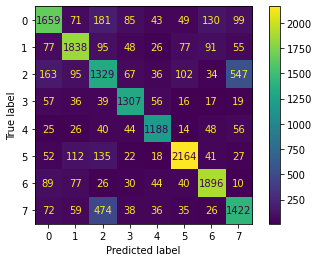

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgst)).plot()

## 2. Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc=dtc.predict(X_test)

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_dtc))

Score on test data:-  0.7379799173065564


In [ ]:
print("Score on training data:- ",dtc.score(X_train,y_train))

Score on training data:-  0.9759397183754218


In [ ]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      2317
           1       0.76      0.77      0.77      2307
           2       0.57      0.58      0.57      2373
           3       0.79      0.84      0.82      1547
           4       0.82      0.84      0.83      1441
           5       0.78      0.84      0.81      2571
           6       0.85      0.83      0.84      2212
           7       0.61      0.56      0.58      2162

    accuracy                           0.74     16930
   macro avg       0.74      0.75      0.74     16930
weighted avg       0.74      0.74      0.74     16930



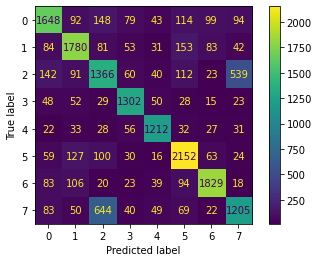

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

## 3. Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc=rfc.predict(X_test)

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_rfc))

Score on test data:-  0.7859421145894862


In [ ]:
print("Score on training data:- ",rfc.score(X_train,y_train))

Score on training data:-  0.9759397183754218


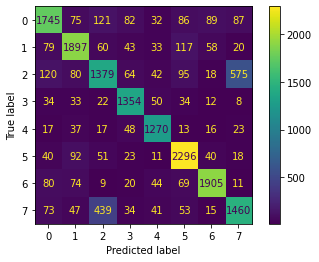

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

## 4. Bagging with Logistic Regression

In [ ]:
bgg_lg=BaggingClassifier(estimator=lgst)

In [ ]:
bgg_lg.fit(X_train,y_train)

BaggingClassifier(estimator=LogisticRegression())

In [ ]:
y_pred_bgg=bgg_lg.predict(X_test)

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_bgg))

Score on test data:-  0.7744831659775546


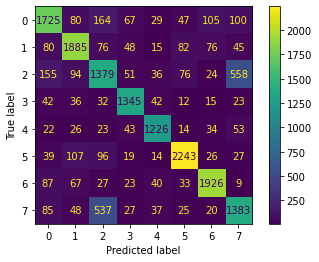

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

In [ ]:
gnb=GaussianNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_Pred_gnb=gnb.predict(X_test)

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_Pred_gnb))

Score on test data:-  0.6316597755463674


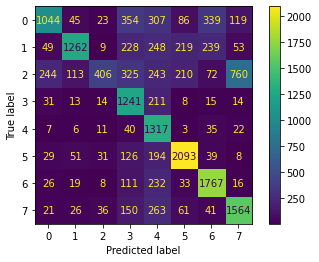

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_Pred_gnb)).plot()

In [ ]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [ ]:
y_pred_bnb=bnb.predict(X_test)

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_bnb))

Score on test data:-  0.8103957471943296


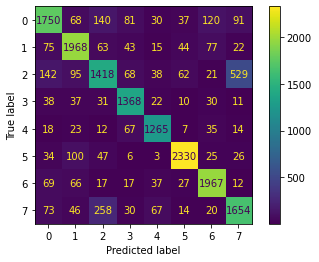

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bnb)).plot()

In [ ]:
passv=PassiveAggressiveClassifier()

In [ ]:
passv.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [ ]:
y_pred_pass=passv.predict(X_test)

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_pass))

Score on test data:-  0.7606024808033077


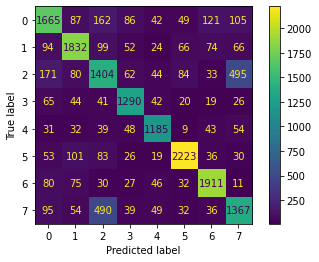

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_pass)).plot()

In [ ]:
y_pred_pass

array([5, 0, 1, ..., 5, 3, 0])

## Implementation of Stacking classifier

In [ ]:
models=[('rfc',rfc),('bnb',bnb),('bgg_lgs',bgg_lg)]

stack_cls=StackingClassifier(estimators=models,final_estimator=rfc)

In [ ]:
stack_cls.fit(X_train,y_train)

StackingClassifier(estimators=[('rfc', RandomForestClassifier()),
                               ('bnb', BernoulliNB()),
                               ('bgg_lgs',
                                BaggingClassifier(estimator=LogisticRegression()))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred_stc=stack_cls.predict(X_test)

In [ ]:
stack_cls.score(X_train,y_train)

0.9391365064587455

In [ ]:
print("Score on test data:- ",accuracy_score(y_test,y_pred_stc))

Score on test data:-  0.8418192557590077


In [ ]:
y_pred_stc

array([5, 0, 6, ..., 5, 4, 0])

## 5. Implemention of ANN

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense , SimpleRNN,LSTM,Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout,SpatialDropout1D
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

In [ ]:
print(y_scaled)

[0 0 0 ... 7 7 7]


In [ ]:
dummy_y = to_categorical(y_scaled)

In [ ]:
print(dummy_y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
X_train.shape

(34372, 2500)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,dummy_y,test_size=0.33,random_state=42)

In [ ]:
model = Sequential()
model.add(keras.layers.Input(2500,None))
model.add(Dense(228, activation='relu'))
model.add(Dense(114, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 228)               570228    
                                                                 
 dense_1 (Dense)             (None, 114)               26106     
                                                                 
 dense_2 (Dense)             (None, 60)                6900      
                                                                 
 dense_3 (Dense)             (None, 8)                 488       
                                                                 
Total params: 603,722
Trainable params: 603,722
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    callbacks=[es],
                    epochs=20,
                    batch_size=64)

Epoch 1/20
538/538 [==============================] - 7s 12ms/step - loss: 0.7782 - accuracy: 0.7371 - val_loss: 0.5661 - val_accuracy: 0.8116
Epoch 2/20
538/538 [==============================] - 6s 11ms/step - loss: 0.3223 - accuracy: 0.8888 - val_loss: 0.5847 - val_accuracy: 0.8134
Epoch 3/20
538/538 [==============================] - 6s 12ms/step - loss: 0.2044 - accuracy: 0.9226 - val_loss: 0.6873 - val_accuracy: 0.8058
Epoch 4/20
538/538 [==============================] - 6s 11ms/step - loss: 0.1516 - accuracy: 0.9411 - val_loss: 0.7388 - val_accuracy: 0.8008
Epoch 5/20
538/538 [==============================] - 6s 11ms/step - loss: 0.1324 - accuracy: 0.9489 - val_loss: 0.8177 - val_accuracy: 0.8047
Epoch 6/20
538/538 [==============================] - 7s 13ms/step - loss: 0.1170 - accuracy: 0.9526 - val_loss: 0.8945 - val_accuracy: 0.7935
Epoch 7/20
538/538 [==============================] - 6s 11ms/step - loss: 0.1140 - accuracy: 0.9525 - val_loss: 0.9493 - val_accuracy: 0.7954

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)

530/530 [==============================] - 1s 1ms/step - loss: 0.5661 - accuracy: 0.8116


In [ ]:
print("Loss:- ",loss)
print("Accuracy:- ",accuracy)

Loss:-  0.566121518611908
Accuracy:-  0.8116361498832703


In [ ]:
model2 = keras.Sequential()

# Input layer
model2.add(keras.layers.Input(shape=(2500,)))

# Hidden layers
model2.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())
model2.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model2.add(keras.layers.BatchNormalization())

# Output layer
model2.add(Dense(8, activation='softmax'))

In [ ]:
# Compile the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1280512   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_2 (Batc  (None, 128)             

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history2 = model2.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    callbacks=[es],
                    epochs=20, # you can set this to a big number!
                    batch_size=64)

Epoch 1/20
538/538 [==============================] - 18s 31ms/step - loss: 0.9096 - accuracy: 0.6950 - val_loss: 0.5822 - val_accuracy: 0.8070
Epoch 2/20
538/538 [==============================] - 17s 32ms/step - loss: 0.3517 - accuracy: 0.8794 - val_loss: 0.5960 - val_accuracy: 0.8061
Epoch 3/20
538/538 [==============================] - 17s 31ms/step - loss: 0.2347 - accuracy: 0.9160 - val_loss: 0.6649 - val_accuracy: 0.7988
Epoch 4/20
538/538 [==============================] - 18s 34ms/step - loss: 0.1914 - accuracy: 0.9292 - val_loss: 0.6968 - val_accuracy: 0.8046
Epoch 5/20
538/538 [==============================] - 17s 32ms/step - loss: 0.1752 - accuracy: 0.9331 - val_loss: 0.7402 - val_accuracy: 0.7927
Epoch 6/20
538/538 [==============================] - 17s 31ms/step - loss: 0.1522 - accuracy: 0.9387 - val_loss: 0.7752 - val_accuracy: 0.8026
Epoch 7/20
538/538 [==============================] - 17s 32ms/step - loss: 0.1432 - accuracy: 0.9417 - val_loss: 0.7981 - val_accuracy:

In [ ]:
loss,accuracy=model2.evaluate(X_test,y_test)
print("Loss:- ",loss)
print("Accuracy:- ",accuracy)

530/530 [==============================] - 2s 4ms/step - loss: 0.5822 - accuracy: 0.8070
Loss:-  0.5822256803512573
Accuracy:-  0.8070289492607117


In [ ]:
model3 = keras.Sequential()

# Input layer
model3.add(keras.layers.Input(shape=(2500,)))
# Hidden layers
model3.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))

model3.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))

model3.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))

model3.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.BatchNormalization())
model3.add(Dropout(0.6))
# Output layer
model3.add(Dense(8, activation='softmax'))

In [ ]:
# Compile the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               1280512   
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history3 = model3.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    callbacks=[es],
                    epochs=20, # you can set this to a big number!
                    batch_size=64)

Epoch 1/20
538/538 [==============================] - 20s 33ms/step - loss: 2.3921 - accuracy: 0.1795 - val_loss: 1.6828 - val_accuracy: 0.4566
Epoch 2/20
538/538 [==============================] - 17s 32ms/step - loss: 1.5607 - accuracy: 0.4246 - val_loss: 0.8629 - val_accuracy: 0.7217
Epoch 3/20
538/538 [==============================] - 15s 29ms/step - loss: 1.0285 - accuracy: 0.6435 - val_loss: 0.6514 - val_accuracy: 0.7784
Epoch 4/20
538/538 [==============================] - 15s 28ms/step - loss: 0.8103 - accuracy: 0.7261 - val_loss: 0.5968 - val_accuracy: 0.8049
Epoch 5/20
538/538 [==============================] - 15s 28ms/step - loss: 0.6897 - accuracy: 0.7751 - val_loss: 0.5686 - val_accuracy: 0.8168
Epoch 6/20
538/538 [==============================] - 16s 30ms/step - loss: 0.6195 - accuracy: 0.8009 - val_loss: 0.5706 - val_accuracy: 0.8231
Epoch 7/20
538/538 [==============================] - 16s 30ms/step - loss: 0.5661 - accuracy: 0.8228 - val_loss: 0.5638 - val_accuracy:

In [ ]:
loss,accuracy=model3.evaluate(X_test,y_test)
print("Loss:- ",loss)
print("Accuracy:- ",accuracy)

530/530 [==============================] - 2s 3ms/step - loss: 0.5638 - accuracy: 0.8258
Loss:-  0.5638118386268616
Accuracy:-  0.8258121609687805
